Cross validation accuracy for Knn:  0.828472436094857
AUC is:  0.9872387467665283


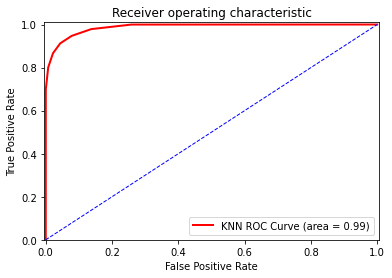

In [22]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt






import numpy as np
import pandas as pd

sat_df = pd.read_csv(
    'https://raw.githubusercontent.com/christianesqueda/temprepo/secondary/satisfaction_2015.xlsx%20-%20satisfaction_v2.csv')


sat_df = pd.concat([sat_df,pd.get_dummies(sat_df['Gender'], prefix='Gender')],axis=1)
sat_df.drop(['Gender'],axis=1, inplace=True)

sat_df = pd.concat([sat_df,pd.get_dummies(sat_df['Type of Travel'], prefix='Travel_type')],axis=1)
sat_df.drop(['Type of Travel'],axis=1, inplace=True)

sat_df = pd.concat([sat_df,pd.get_dummies(sat_df['Class'], prefix='Class')],axis=1)
sat_df.drop(['Class'],axis=1, inplace=True)


feature_cols = ['Gender_Female', 'Gender_Male', 'Travel_type_Business travel',
                'Travel_type_Personal Travel', 'Age', 'Food and drink',
                'Seat comfort', 'Online boarding', 'Inflight wifi service', 
                'Cleanliness', 'Inflight entertainment', 'Gate location', 
                'Ease of Online booking', 'Class_Business', 'Class_Eco', 'Class_Eco Plus' ,'Gate location' ]

X = sat_df[feature_cols]
X = np.nan_to_num(X)

y = sat_df['satisfaction_v2']


k = 7
my_knn = KNeighborsClassifier(n_neighbors=k)
my_knn.fit(X, y)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

accuracy_list = cross_val_score(my_knn, X, y, cv=10, scoring='accuracy')

accuracy_cv = accuracy_list.mean()

print('Cross validation accuracy for Knn: ', accuracy_cv)

# Training ONLY on the training set:
# my_knn.fit(X_train, y_train)

# # Testing on the testing set:
# y_predict = my_knn.predict(X_test)




# accuracy = accuracy_score(y_test, y_predict)
# print('KNN accuracy: ', accuracy)

y_predict_prob_knn = my_knn.predict_proba(X_test)


fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_knn[:,1], pos_label='satisfied')


AUC = metrics.auc(fpr, tpr)
print('AUC is: ', AUC)

# ROC
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='KNN ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

